<font size="+5">#03. Arboles de Decision</font>

<ul>
    <li>Resolver dudas → Pregunta en <img src="https://discord.com/assets/f9bb9c4af2b9c32a2c5ee0014661546d.png" style="height: 1em; vertical-align: middle;"> <a href="https://discord.gg/cmB3KGsqMy">Discord</a></li>
    <li>Tutoriales → <img src="https://openmoji.org/php/download_asset.php?type=emoji&emoji_hexcode=E044&emoji_variant=color" style="height: 1em; vertical-align: middle;"> <a href="https://www.youtube.com/channel/UCovCte2I3loteQE_kRsfQcw">YouTube</a></li>
    <li>Reservar Clases → <span style="color: orange">@</span> <a href="https://sotastica.com/reservar">sotastica</a></li>
</ul>

# Cargar Datos

> Cargamos los datos del titanic para predecir la **probabilidad de que una persona sobreviva** en función de otras características como la **edad, sexo**, etc...

```python
sns.load_dataset(name='titanic')
```

In [1]:
import seaborn as sns

In [2]:
df = sns.load_dataset(name='titanic').iloc[:, :4].dropna()
df.head()

,survived,pclass,sex,age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [3]:
df.head()

,survived,pclass,sex,age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [4]:
df.sample(4)

,survived,pclass,sex,age
728,0,2,male,25.0
628,0,3,male,26.0
412,1,1,female,33.0
620,0,3,male,27.0


# Seleccionar Variables para el Modelo

> Comúnmente se conoce a esta temática de la Estadística como **Análisis Exploratorio de los Datos _(EDA)_**. El objetivo fundamental de este tópico es encontrar las variables que más se correlacionen y que den a entender un modelo de Árboles de Decisión, donde la variable objetivo debería ser categórica.
>
> No vamos a aentrar mucho en detalle, de momento. Así que tan solo seleccionaremos variables que nos parezcan interesantes. Estas variables deberemos distinguirlas según su papel en el modelo:
>
> 1.  Explicativas/Features/Input `X`
> 2.  Objetivo/Class/Target `y`

In [5]:
df.head()

,survived,pclass,sex,age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [6]:
objetivo = df.survived

In [7]:
explicativas = df.drop(columns='survived')

# Modelo de Árboles de Decisión `DecisionTreeClassifier()`

## Entrenar Modelo

> 1. **Necesidad:** Entrenar Modelo
> 2. **Solución: Función** `fit()`

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
model = DecisionTreeClassifier()

In [35]:
import pandas as pd

In [36]:
model.fit(X=explicativas, y=objetivo)

ValueError: could not convert string to float: 'male'

In [37]:
df_copy = pd.get_dummies(df, drop_first=True)

<AxesSubplot:>

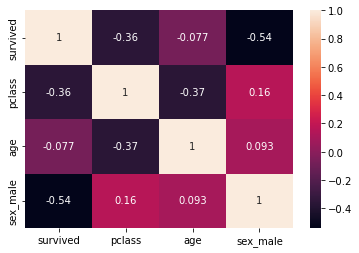

In [40]:
sns.heatmap(df_copy.corr(), annot=True)

In [45]:
df.survived.value_counts()

0    424
1    290
Name: survived, dtype: int64

In [46]:
df.sex.value_counts()

male      453
female    261
Name: sex, dtype: int64

In [49]:
df.groupby(['survived', 'sex']).size().to_frame(name='freq')

freq
survived sex         
0        female    64
         male     360
1        female   197
         male      93

In [16]:
explicativas = pd.get_dummies(explicativas, drop_first=True)

In [17]:
explicativas = explicativas.dropna()

In [18]:
model = DecisionTreeClassifier(max_depth=3)

In [19]:
model.fit(X=explicativas, y=objetivo)

DecisionTreeClassifier(max_depth=3)

## Visualización del Modelo

> - `tree.plot_tree()`

In [54]:
from sklearn.tree import plot_tree

In [56]:
import matplotlib.pyplot as plt

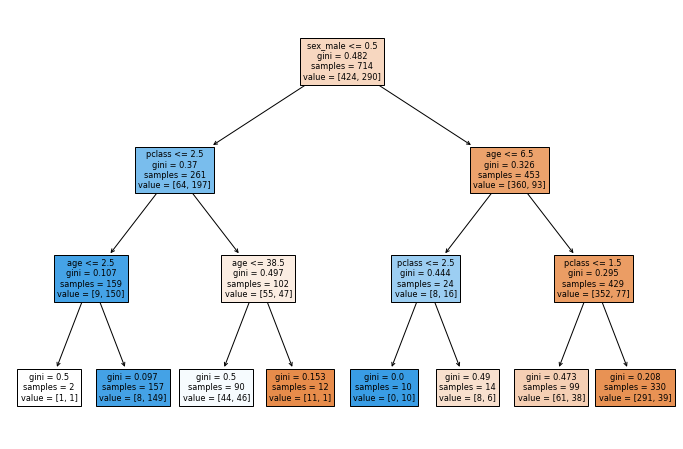

In [58]:
plt.figure(figsize=(12,8))
plot_tree(decision_tree=model, feature_names=explicativas.columns, filled=True);

In [62]:
39/330

0.11818181818181818

In [64]:
model.predict_proba(X=explicativas.loc[281].values.reshape(1,-1))

array([[0.88181818, 0.11818182]])

In [59]:
a = df.sample()

In [61]:
explicativas.loc[281]

pclass       3.0
age         28.0
sex_male     1.0
Name: 281, dtype: float64

In [60]:
a

,survived,pclass,sex,age
281,0,3,male,28.0


## Predicciones con el Modelo

> - `model.predict_proba()`
> - `model.predict()`

In [51]:
model.predict_proba(explicativas)

array([[0.92857143, 0.07142857],
       [0.        , 1.        ],
       [0.33333333, 0.66666667],
       ...,
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.54545455, 0.45454545]])

## Interpretación del Modelo

> ¿Qué tiene que ver el **Análisis Exploratorio de los Datos _(EDA)_** con la Interpretación del Modelo?

In [51]:
explicativas_cat = df.loc[:, df.dtypes == 'object'].drop(columns='uso_internet').columns
comb = list(zip(explicativas_cat, range(3)))
comb

KeyError: "['uso_internet'] not found in axis"

In [ ]:
### Variables Numéricas

#### Método Gráfico

# A la hora de visualizar la relación entre las diferentes variables numércias explicativas, no podemos hacer un conteo como antes. Sino que debemos ver cómo se distribuyen estas variables en las distintas categorías de la variable objetivo.

# Podemos hacer diferentes gráficas:

explicativas_num = [i for i in dfsel.columns if i not in explicativas_cat]
explicativas_num.remove('survived')
comb = list(zip(explicativas_num, range(len(explicativas_num))))
comb

In [ ]:


##### Histograma

fig, axs = plt.subplots(ncols=4, figsize=(20,6))
fig.suptitle('Vertically stacked subplots')

for i,j in comb:
    for lab, dat in dfsel.groupby('survived'):
        axs[j].hist(x=dat[i], label=lab, alpha=0.7, edgecolor='black', bins=20)
        axs[j].set_title(i)
        axs[j].legend(title='Survived')

# Predicciones vs Realidad

> ¿Cómo de Bueno es mi Modelo? **Bondad de Ajuste**

## Precisión

> - `model.score()`

## Matriz de Confusión

> 1. **Sensitividad** (aciertos en casos positivos, $y=1$)
> 2. **Especificidad** (aciertos en casos negativos, $y=0$).

## Curva ROC

> Una forma de mezclar tanto la sensitividad, como la especificidad.